# Challenge Set 1

Topic: Explore MTA turnstile data  
Date: 01/25/2016  
Name: Jamie Fradkin  
Worked with: N/A  

In [295]:
import csv
import dateutil.parser
import datetime
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

Reading files for 4 weeks of turnstile data:  
**NOTE:** Only the first 100,000 lines of each file were processed in order to expedite execution


In [296]:
c_orig=csv.reader(open("turnstile_150411_new.txt","rb"))
c_orig=[[word.strip() for word in row] for row in c_orig]
c=c_orig[1:100000]

c2_orig=csv.reader(open("turnstile_150418_new.txt","rb"))
c2_orig=[[word.strip() for word in row] for row in c2_orig]
c2=c2_orig[1:100000]

c3_orig=csv.reader(open("turnstile_150425_new.txt","rb"))
c3_orig=[[word.strip() for word in row] for row in c3_orig]
c3=c3_orig[1:100000]

c4_orig=csv.reader(open("turnstile_150502_new.txt","rb"))
c4_orig=[[word.strip() for word in row] for row in c4_orig]
c4=c4_orig[1:100000]

# Challenge 1

Make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. 

In [305]:
def create_dict(file1):
    dict1=defaultdict(list)
    for row in file1:
        dict1_key=(row[0],row[1],row[2],row[3]) #establishing key as first 4 columns
        dict1_value=[row[4],row[5],row[6],row[7],row[8],row[9],row[10]] #establishing value as remaining columns
        dict1[dict1_key]=dict1_value
    return dict1

Printing first 5 key/value pairs in dictionary:

In [307]:
pprint ({k: create_dict(c)[k] for k in create_dict(c).keys()[:5]})

{('A013', 'R081', '01-03-00', '49 ST-7 AVE'): ['NQR',
                                               'BMT',
                                               '04/10/2015',
                                               '20:00:00',
                                               'REGULAR',
                                               '0002872034',
                                               '0003309756'],
 ('A030', 'R083', '01-06-00', '23 ST-5 AVE'): ['NR',
                                               'BMT',
                                               '04/10/2015',
                                               '20:00:00',
                                               'REGULAR',
                                               '0005795618',
                                               '0003233286'],
 ('B014', 'R148', '00-00-01', 'PARKSIDE AVE'): ['BQ',
                                                'BMT',
                                                '04/10/2015',
            

# Challenge 2

Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

In [308]:
def time_series(file1):
    dict2=defaultdict(list)
    for row in file1:
        dict2_key=(row[0],row[1],row[2],row[3]) # key is first 4 columns
        datetime_string=row[6]+' '+row[7] # combining date and time into string to be parsed
        entries=int(row[9])
        dict2_value=[dateutil.parser.parse(datetime_string),entries] #value will be list of [date,entries]
        dict2[dict2_key]=dict2_value
    return dict2

Printing first 5 key/value pairs in dictionary:

In [309]:
pprint ({k: time_series(c)[k] for k in time_series(c).keys()[:5]})

{('A013', 'R081', '01-03-00', '49 ST-7 AVE'): [datetime.datetime(2015, 4, 10, 20, 0),
                                               2872034],
 ('A030', 'R083', '01-06-00', '23 ST-5 AVE'): [datetime.datetime(2015, 4, 10, 20, 0),
                                               5795618],
 ('B014', 'R148', '00-00-01', 'PARKSIDE AVE'): [datetime.datetime(2015, 4, 10, 21, 0),
                                                12452594],
 ('B016', 'R098', '00-00-01', 'CHURCH AVE'): [datetime.datetime(2015, 4, 10, 20, 0),
                                              622152],
 ('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'): [datetime.datetime(2015, 4, 10, 21, 0),
                                                 6904179]}


# Challenge 3

We want total daily entries, which is the total number of passengers that entered through this turnstile on this day.

In [312]:
def daily_entries(file1):
    dict3=defaultdict(list)
    temp_dict=defaultdict(list)
    for row in file1:
        #temporarily setting key to include first 4 columns AND date
        temp_key=(row[0],row[1],row[2],row[3],dateutil.parser.parse(row[6])) 
        entries=int(row[9])
        temp_value=[entries]
        temp_dict[temp_key].append(entries)
    for k,v in temp_dict.items():
        delta=max(v)-min(v)
        dict3_key=k[0:4]
        dict3_value=(k[4],delta)
        dict3[dict3_key].append(dict3_value)
    return dict3

Printing first 5 key:value pairs in dictionary

In [313]:
pprint({k: dict(daily_entries(c))[k] for k in dict(daily_entries(c)).keys()[:5]})

{('A013', 'R081', '01-03-00', '49 ST-7 AVE'): [(datetime.datetime(2015, 4, 4, 0, 0),
                                                525),
                                               (datetime.datetime(2015, 4, 10, 0, 0),
                                                2002),
                                               (datetime.datetime(2015, 4, 5, 0, 0),
                                                299),
                                               (datetime.datetime(2015, 4, 9, 0, 0),
                                                2045),
                                               (datetime.datetime(2015, 4, 7, 0, 0),
                                                1918),
                                               (datetime.datetime(2015, 4, 8, 0, 0),
                                                1954),
                                               (datetime.datetime(2015, 4, 6, 0, 0),
                                                1740)],
 ('A030', 'R083', '0

# Challenge 4

Plot the daily time series for a turnstile.

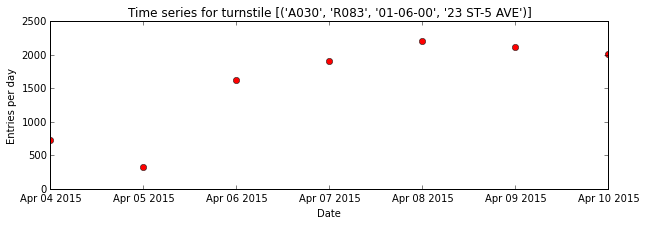

In [314]:
%matplotlib inline

dict4=daily_entries(c) #reproducing dictionary from daily_entries()
dates=[]
counts=[]
firstpair = {k: dict4[k] for k in dict4.keys()[:1]} #isolating one turnstile
for tup in firstpair.values():
    for date,count in tup:
        dates.append(date) #bring dates from dictionary into new list
        counts.append(count) #bring counts from dictionary into corresponding list
plt.figure(figsize=(10,3))
plt.plot(dates,counts,'ro')
plt.title('Time series for turnstile {}'.format(firstpair.keys()))
plt.xlabel('Date')
plt.ylabel('Entries per day')

# Challenge 5

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [315]:
def combine_SCP(file1):
    dict3=daily_entries(file1) #reproducing dictionary from daily_entries()
    temp_dict=defaultdict(list)
    
    for key,value in dict3.items():
        for date,count in value:
            #temporarily setting key value to include first C/A, Unit, Station AND date to align correctly with entries
            temp_key=(key[0],key[1],key[3],date) 
            temp_value=(count)
            temp_dict[temp_key].append(temp_value)

    dict5=defaultdict(list)
    for key,value in temp_dict.items():
        dict5_key=(key[0],key[1],key[2]) #resetting key to have only C/A, Unit, Station
        dict5[dict5_key].append((key[3],sum(value))) #value becomes (date, entry sum)
    return dict5

Printing first 5 key:value pairs of dictionary:

In [316]:
pprint({k: dict(combine_SCP(c))[k] for k in dict(combine_SCP(c)).keys()[:5]})

{('B013', 'R196', 'PROSPECT PARK'): [(datetime.datetime(2015, 4, 10, 0, 0),
                                      5490),
                                     (datetime.datetime(2015, 4, 7, 0, 0),
                                      5235),
                                     (datetime.datetime(2015, 4, 4, 0, 0),
                                      3801),
                                     (datetime.datetime(2015, 4, 9, 0, 0),
                                      5632),
                                     (datetime.datetime(2015, 4, 8, 0, 0),
                                      5574),
                                     (datetime.datetime(2015, 4, 5, 0, 0),
                                      2921),
                                     (datetime.datetime(2015, 4, 6, 0, 0),
                                      5240)],
 ('D012', 'R395', 'KINGS HIGHWAY'): [(datetime.datetime(2015, 4, 7, 0, 0),
                                      5010),
                                     (

# Challenge 6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.



In [317]:
def station_total(file1):
    dict5=combine_SCP(file1) #reproducing dictionary from combine_SCP()
    temp_dict=defaultdict(list)

    for key,value in dict5.items():
        for date,count in value:
            temp_key=(key[2],date) #temporarily adding date to key to align with entries
            temp_value=(count)
            temp_dict[temp_key].append(temp_value)

    dict6=defaultdict(list)
    for key,value in temp_dict.items():
        dict6_key=(key[0]) #resetting key to be station only
        dict6[dict6_key].append((key[1],sum(value))) #value becomes (date, entry sum)
    return dict6

Printing first 5 key:value pairs in dictionary:

In [318]:
pprint({k: dict(station_total(c))[k] for k in dict(station_total(c)).keys()[:5]})

{'46 ST': [(datetime.datetime(2015, 4, 6, 0, 0), 8294),
           (datetime.datetime(2015, 4, 7, 0, 0), 8539),
           (datetime.datetime(2015, 4, 10, 0, 0), 8541),
           (datetime.datetime(2015, 4, 4, 0, 0), 5458),
           (datetime.datetime(2015, 4, 5, 0, 0), 4051),
           (datetime.datetime(2015, 4, 8, 0, 0), 8485),
           (datetime.datetime(2015, 4, 9, 0, 0), 8682)],
 'BAY PKY-22 AVE': [(datetime.datetime(2015, 4, 7, 0, 0), 6823),
                    (datetime.datetime(2015, 4, 5, 0, 0), 5237),
                    (datetime.datetime(2015, 4, 10, 0, 0), 6717),
                    (datetime.datetime(2015, 4, 4, 0, 0), 6288),
                    (datetime.datetime(2015, 4, 6, 0, 0), 6758),
                    (datetime.datetime(2015, 4, 9, 0, 0), 6649),
                    (datetime.datetime(2015, 4, 8, 0, 0), 6805)],
 'BEACH 67 ST': [(datetime.datetime(2015, 4, 7, 0, 0), 2011),
                 (datetime.datetime(2015, 4, 10, 0, 0), 1973),
                 (dateti

# Challenge 7

Plot the time series for a station.

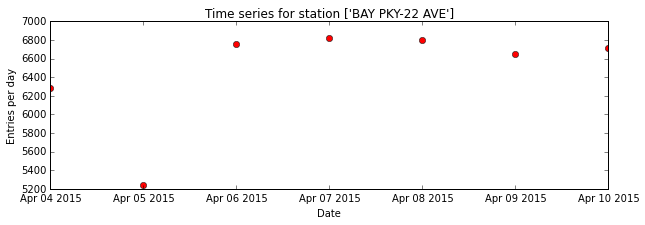

In [319]:
dict7=station_total(c) #reproducing dictionary from station_total
dates=[]
counts=[]
firstpair = {k: dict7[k] for k in dict7.keys()[:1]} #isolating one station key:value pair
for tup in firstpair.values():
    for date,count in tup:
        dates.append(date) #bring dates from dictionary into new list
        counts.append(count) #bring counts from dictionary into corresponding list
        
plt.figure(figsize=(10,3))
plt.plot(dates,counts,'ro')
plt.title('Time series for station {}'.format(firstpair.keys()))
plt.xlabel('Date')
plt.ylabel('Entries per day')

# Challenge 8

Plot weekly commute numbers for one station.

([<matplotlib.axis.XTick at 0x12854d410>,
 <a list of 7 Text xticklabel objects>)

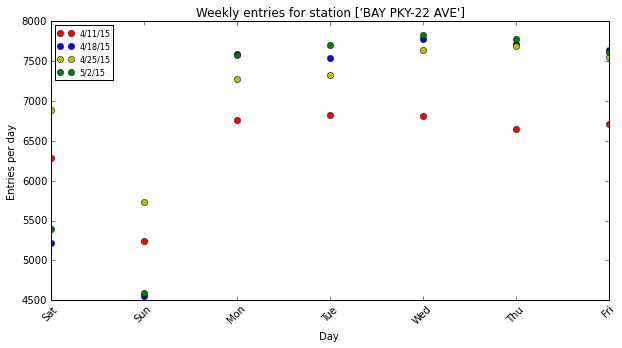

In [321]:
week_count_list=[]

#create key:value pairs for the same station in 4 different weeks
week1_pair = {k: station_total(c)[k] for k in station_total(c).keys()[:1]}
week1_pair_key = week1_pair.keys()
week2_pair = {week1_pair_key: station_total(c2)[week1_pair_key] for week1_pair_key in station_total(c2).keys()[:1]}
week3_pair = {week1_pair_key: station_total(c3)[week1_pair_key] for week1_pair_key in station_total(c3).keys()[:1]}
week4_pair = {week1_pair_key: station_total(c4)[week1_pair_key] for week1_pair_key in station_total(c4).keys()[:1]}

for pair in week1_pair,week2_pair,week3_pair,week4_pair:
    temp_dict=defaultdict(list)
    for tup in pair.values():
        for date,count in tup:
            temp_dict[date]=count #creating a dictionary of {date:count} for each week
    for key in sorted(temp_dict):
        week_count_list.append(temp_dict[key]) #bring counts to large "week_count_list"

#break up week_count_list into 4 separate weeks:
week_count_list1=week_count_list[:7]
week_count_list2=week_count_list[7:14]
week_count_list3=week_count_list[14:21]
week_count_list4=week_count_list[21:]
    
plt.figure(figsize=(10,5))
plt.plot(week_count_list1,'ro', label='4/11/15')
plt.plot(week_count_list2,'bo',label='4/18/15')
plt.plot(week_count_list3,'yo',label='4/25/15')
plt.plot(week_count_list4,'go',label='5/2/15')
plt.title('Weekly entries for station {}'.format(week1_pair.keys()))
plt.xlabel('Day')
plt.ylabel('Entries per day')
plt.legend(loc=2,prop={'size':8})

x = [0,1,2,3,4,5,6]
days = ['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
plt.xticks(x, days, rotation=45)

# Challenge 9


Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [322]:
super_dict=defaultdict(list)
dicts=[station_total(c),station_total(c2),station_total(c3),station_total(c4)]

#creating a large dictionary with the (date, entry) tuples for all weeks combined
for d in dicts:
    for k, v in d.iteritems():
        for tup in v:
            super_dict[k].append(tup) 

total_dict=defaultdict(list)

for k,v in super_dict.items():
    for tup in v:
        #creating a dictionary with station:entry pairs, still separated by day
        total_dict[k].append(tup[1]) 
        
for k,v in total_dict.items():
    #updating dictionary so values are sum of entries for the week
    total_dict[k]=sum(v)

#sorting in order of total entries
sorted_pairs=(sorted(total_dict.items(), key=lambda x: x[1]))

Printing stations sorted by number of entries:

In [323]:
pprint (sorted_pairs)

[('BEACH 105 ST', 6346),
 ('BROAD CHANNEL', 7537),
 ('SMITH-9 ST', 12014),
 ('BEACH 98 ST', 12388),
 ('BEACH 44 ST', 14540),
 ('ROCKAWAY PK 116', 16089),
 ('BEACH 90 ST', 20219),
 ('BEACH 36 ST', 21498),
 ('AQUEDUCT-N CNDT', 27297),
 ('CYPRESS HILLS', 34725),
 ('OXFORD-104 ST', 36346),
 ('VAN ALSTON-21ST', 36421),
 ('ATLANTIC AVE', 41117),
 ('55 ST', 41605),
 ('BUSHWICK AVE', 42528),
 ('AQUEDUCT TRACK', 43074),
 ('BEACH 25 ST', 43085),
 ('PARK PLACE', 44954),
 ('BOTANIC GARDEN', 45580),
 ('BOROUGH HALL/CT', 50590),
 ('HOWARD BCH-JFK', 52742),
 ('W 8 ST-AQUARIUM', 54179),
 ('BEACH 67 ST', 54630),
 ('121 ST', 57171),
 ('ALABAMA AVE', 59362),
 ('BEACH 60 ST', 59555),
 ('GREENWOOD-111', 60373),
 ('JFK HOWARD BCH', 61430),
 ('111 ST', 61874),
 ('104 ST', 63278),
 ('BEVERLEY ROAD', 63708),
 ('LIBERTY AVE', 63740),
 ('BAY 50 ST', 64587),
 ('BOYD-88 ST', 65794),
 ('AVE H', 66524),
 ('SENECA AVE', 68182),
 ('OCEAN PARKWAY', 74011),
 ('BOWERY', 74226),
 ('CHAUNCEY ST', 74939),
 ('HEWES ST', 7550

# Challenge 10


Make a single list of these total ridership values and plot it.

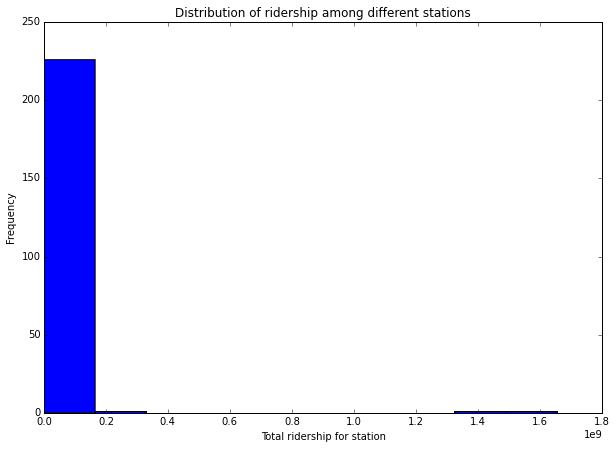

In [335]:
station_list=[]
total_ridership_counts=[]

for tup in sorted_pairs:
    station_list.append(tup[0]) #bringing stations to new list
    total_ridership_counts.append(tup[1]) #bring total entries to corresponding list

plt.figure(figsize=(10,7))
plt.hist(total_ridership_counts)
plt.title('Distribution of ridership among different stations')
plt.xlabel('Total ridership for station')
plt.ylabel('Frequency')

<Container object of 10 artists>

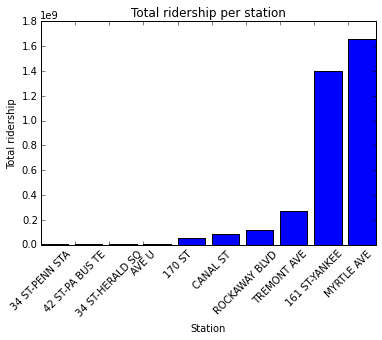

In [340]:
x = range(0,len(total_dict.keys())+1)
labels=[tup[0] for tup in sorted_pairs]
plt.xticks(x, labels, rotation=45)
indices = range(len(total_ridership_counts))

plt.title('Total ridership per station')
plt.xlabel('Station')
plt.ylabel('Total ridership')

#plot top 10 highest travel stations
plt.bar(indices[len(indices)-10:], total_ridership_counts[len(total_ridership_counts)-10:])